In [32]:
%matplotlib inline

from modsim import *

def plot_results(system):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot_estimates(table2)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='World population (billion)')

def run_simulation(system, update_func):

    results = Series([])
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

In [33]:
#using data from http://www.elephantdatabase.org/report/1995/Africa 
#only recorded "definite" statistics

elephant_database = TimeSeries()

elephant_database[1995] = 286.233
elephant_database[1998] = 301.733
elephant_database[2002] = 402.067
elephant_database[2007] = 472.269
elephant_database[2013] = 401.732

In [64]:

def plot_data():
    plot(elephant_database, 'rs')
    plot(system.elephant_future, 'g-')
    ylim([0,500])
    xlim([1995,2100])
    decorate(title='African Elephant Polulation', xlabel='Year', ylabel='Elephant Population (in thousands)')

In [65]:
pop_array = (286.233,301.733,402.067,472.269,401.732,352.271)
year_array = (1995,1998,2002,2007,2013,2014)

def fit_curve(a=-1.1287, b=28.674, c=262.15):
    pop_fit = TimeSeries()
    for t in linspace(1995, 2013, 100):
        pop_fit[t] = a * (t-1995)**2 + b * (t-1995) + c
    return pop_fit

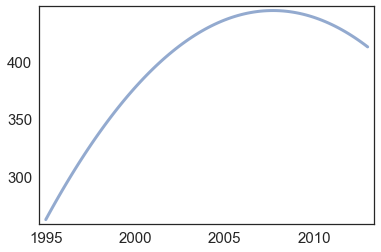

In [66]:
def plot_curve():
    plot(fit_curve())
    
plot_curve()

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


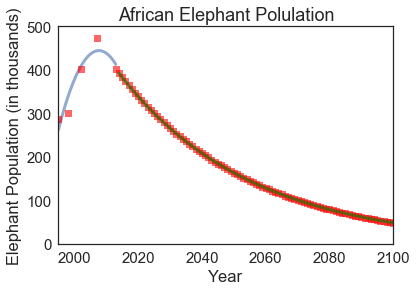

In [68]:
def plot_all():
    newfig()
    plot_curve()
    plot_data()
    
plot_all()

In [59]:
poaching_rate = 0.074
birth_rate = 0.05

system = System(t0 = 2013, tn = 2100, pop = elephant_database[2013],
               poaching_rate = 0.074, birth_rate = 0.05)

def run_simulation(system):
    elephant_future = TimeSeries()
    for i in linrange(system.t0, system.tn):
        births = system.birth_rate * elephant_database[i]
        deaths = system.poaching_rate * elephant_database[i]
        elephant_future[i+1] = births - deaths + elephant_database[i]
    system.elephant_future = elephant_future

run_simulation(system)
system.elephant_future


,value
2014,392.090432
2015,382.680262
2016,373.495935
2017,364.532033
2018,355.783264
2019,347.244466
2020,338.910599
2021,330.776744
2022,322.838102
2023,315.089988


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


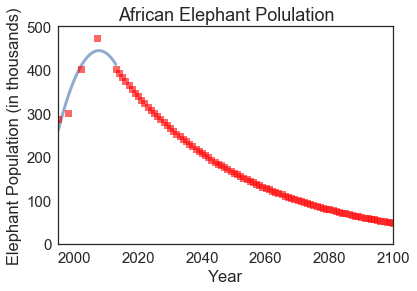

In [42]:
def plot_all():
    newfig()
    plot_curve()
    plot_data()
    
plot_all()